In [1]:
import pandas as pd
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import numpy as np
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from scipy import stats
import seaborn as sns

filename = 'housing.csv'
dataframe = read_csv(filename, delim_whitespace = True , names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])

def remove_outlier(df, col_name):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df.loc[(df[col_name] > fence_low) & (df[col_name] < fence_high)]
    return df_out  

colnames = ['CRIM','ZN','INDUS','NOX','RM','AGE','DIS','TAX','PTRATIO','B','LSTAT','MEDV']
for i in colnames:
    dataframe1 = remove_outlier(dataframe,i)    

    


array = dataframe1.values
X = array[:,0:13]
Y = array[:,13]
X_train, X_Test, Y_train, Y_Test = train_test_split(X,Y, test_size=0.2,random_state=7)


kfold = KFold(n_splits=10, shuffle=True)

dataframe1.corr(method = 'pearson')
print(dataframe1.shape)
print(dataframe.shape)


Using TensorFlow backend.


(466, 14)
(506, 14)


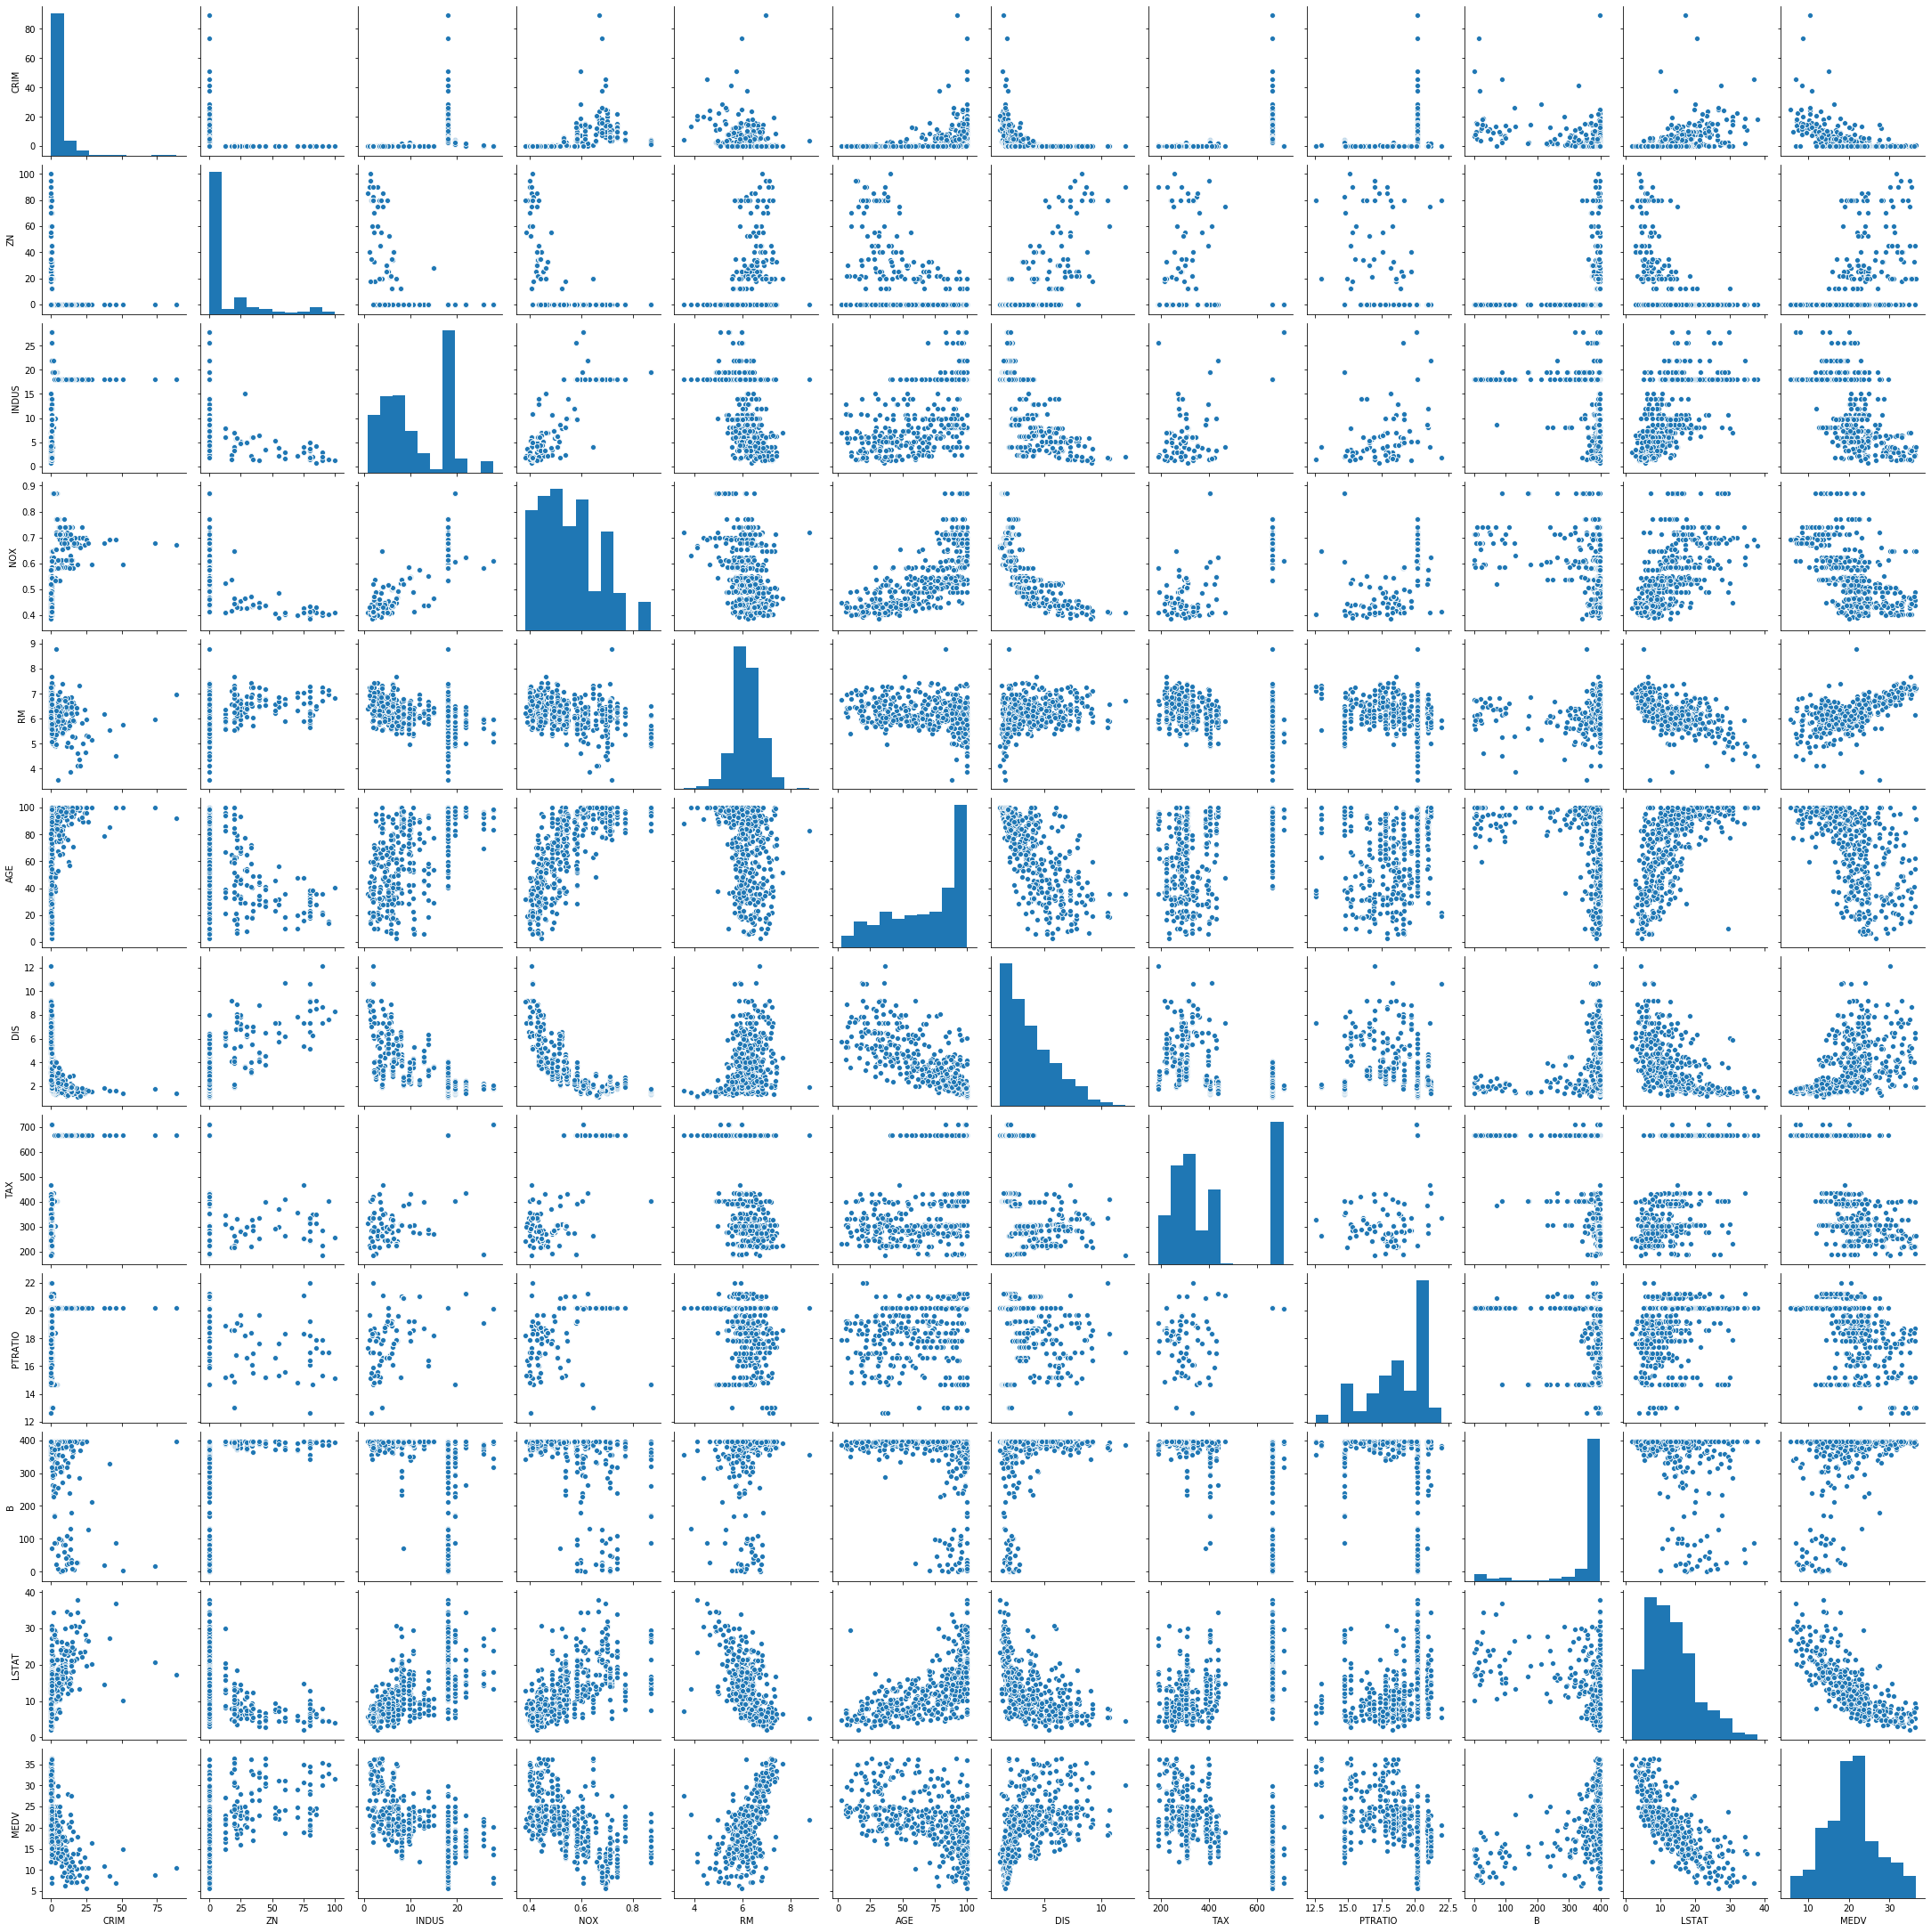

In [2]:
sns.pairplot(dataframe1.loc[:,dataframe1.dtypes == 'float64'])

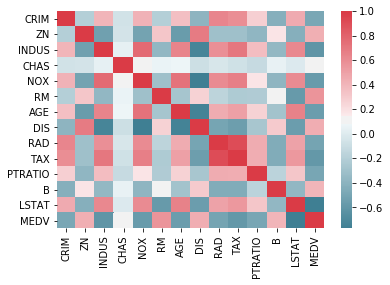

In [3]:
##corr = dataframe1.loc[:,dataframe1.dtypes == 'float64'].corr()
corr = dataframe1.corr(method = 'pearson')
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))

In [4]:
dataframe1.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000
mean,3.590278,10.580472,11.382446,0.060086,0.556826,6.179633,68.666524,3.833586,9.669528,413.105150,18.617382,354.197790,13.275687,20.719099
std,8.245015,22.177036,6.793901,0.237901,0.117400,0.576325,28.046527,2.124901,8.792361,168.544572,2.063273,94.679607,6.934097,6.451416
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.137000,1.000000,187.000000,12.600000,0.320000,1.980000,5.600000
25%,0.082757,0.000000,5.640000,0.000000,0.453000,5.876250,45.175000,2.104425,4.000000,284.000000,17.400000,374.590000,7.790000,16.500000
50%,0.247510,0.000000,9.900000,0.000000,0.538000,6.163500,77.500000,3.272100,5.000000,335.000000,19.100000,391.955000,12.125000,20.600000
75%,3.755473,12.500000,18.100000,0.000000,0.624000,6.506250,94.100000,5.241300,24.000000,666.000000,20.200000,396.397500,17.205000,24.075000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,36.500000


In [21]:
model = LinearRegression()
results = cross_val_score(model, X_train, Y_train, cv=kfold)
model.fit(X_train,Y_train)
predictions = model.predict(X_Test)
print(np.sqrt(mean_squared_error(Y_Test, predictions)))


3.7418213892844334


In [59]:
model = SVR(C = 10000, epsilon = 0.1, kernel = 'poly')
results = cross_val_score(model, X_train, Y_train, cv=kfold)
model.fit(X_train,Y_train)
predictions = model.predict(X_Test)
print(np.sqrt(mean_squared_error(Y_Test, predictions)))


3.549959409000916


In [29]:
model = KNeighborsRegressor(n_neighbors = 1)
results = cross_val_score(model, X_train, Y_train, cv=kfold)
model.fit(X_train,Y_train)
predictions = model.predict(X_Test)
print(np.sqrt(mean_squared_error(Y_Test, predictions)))


4.196262267932808
